<a href="https://colab.research.google.com/github/Montenate/Wind-Energy-Modeling/blob/main/Single_Turbine_Model_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install windpowerlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 1.7 MB/s eta 0:00:00


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from windpowerlib import ModelChain, WindTurbine
from windpowerlib import data as wt

**Reading Weather Data**

In [6]:
Weather_Data = pd.read_csv('24 - weather-montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx: pd.to_datetime(idx, utc=True)) #header used to merge the 1st and 2nd row to 1, as the column title | the rest for modifying the time
Weather_Data

<ipython-input-6-6035a8875b3d>:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  Weather_Data = pd.read_csv('24 - weather-montreal.csv',index_col=0,header=[0,1],date_parser=lambda idx: pd.to_datetime(idx, utc=True)) #header used to merge the 1st and 2nd row to 1, as the column title | the rest for modifying the time


variable_name,pressure,temperature,wind_speed,roughness_length,temperature,wind_speed
height,0,2,10,0,10,50
2019-01-01 00:00:00+00:00,99760,273.37,7.11,0.15,273.27,9.85
2019-01-01 01:00:00+00:00,99480,273.56,6.87,0.15,273.46,10.08
2019-01-01 02:00:00+00:00,99200,273.58,6.21,0.15,273.48,9.27
2019-01-01 03:00:00+00:00,98910,273.61,3.66,0.15,273.51,6.51
2019-01-01 04:00:00+00:00,98760,273.58,1.26,0.15,273.48,2.28
...,...,...,...,...,...,...
2019-12-31 19:00:00+00:00,99430,271.17,2.39,0.15,271.07,3.93
2019-12-31 20:00:00+00:00,99400,271.35,2.59,0.15,271.25,4.69
2019-12-31 21:00:00+00:00,99370,271.69,3.28,0.15,271.59,6.39


**Wind Turbine Selection**

In [10]:
#Turbine_lib = wt.get_turbine_types(). You could run it like this but the table will not come out proper.
Turbine_lib = wt.get_turbine_types(print_out=False)
Turbine_lib

/usr/local/lib/python3.11/dist-packages/windpowerlib/data.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


,manufacturer,turbine_type,has_power_curve,has_cp_curve
0,Adwen/Areva,AD116/5000,True,False
1,Enercon,E-101/3050,True,True
2,Enercon,E-101/3500,True,True
3,Enercon,E-115/3000,True,True
4,Enercon,E-115/3200,True,True
...,...,...,...,...
62,Vestas,V80/2000,True,False
63,Vestas,V90/2000,True,True
64,Vestas,V90/2000/GS,True,True
65,Vestas,V90/3000,True,False


In [11]:
Turbine_lib = wt.get_turbine_types(print_out=False)

/usr/local/lib/python3.11/dist-packages/windpowerlib/data.py:103: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ).fillna(False)


In [15]:
Selected_turbine = {'turbine_type': 'E48/800', 'hub_height': 60} #we created a dictionary for our prefered windturbine
W_Turbine = WindTurbine(**Selected_turbine) #we assign it now to a variable

In [19]:
Turbine_sub_models = {
    'wind_speed_model': 'hellman',                    #'logarithmic' (default - when a model is not selected in your code)
                                                      #'interpolation-extrapolation'

    'density_model': 'ideal_gas',                     #'barometric' (default)
                                                      #'interpolation-extrapolation'

    'temperature_model': 'linear_gradient',           #'interpolation-extrapolation'

    'power_output_model': 'power_coefficient_curve',   #'power_curve' (default)

    'density_correction': True,                        # False (default)

    'obstacle_height': 0,                              # 0 (default)

    'hellman_exp': 0.25                               # 0.1, 0.15, 0.2, 0.25, 0.3, 0.4 (depending on Land Type)
}

In [21]:
Model = ModelChain(W_Turbine, **Turbine_sub_models).run_model(Weather_Data)

In [23]:
Turbine_Power_Output = (Model.power_output)/1000
Turbine_Power_Output

,feedin_power_plant
2019-01-01 00:00:00+00:00,607.007263
2019-01-01 01:00:00+00:00,632.135315
2019-01-01 02:00:00+00:00,518.769474
2019-01-01 03:00:00+00:00,167.707041
2019-01-01 04:00:00+00:00,1.009322
...,...
2019-12-31 19:00:00+00:00,28.706123
2019-12-31 20:00:00+00:00,57.379249
2019-12-31 21:00:00+00:00,160.043377
2019-12-31 22:00:00+00:00,289.477526


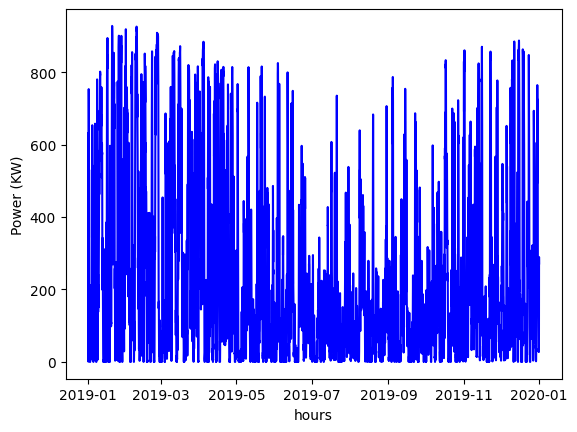

In [25]:
plt.plot(Turbine_Power_Output, c= 'b')
plt.xlabel('hours')
plt.ylabel('Power (KW)')
plt.show()